In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('olive_oil.xlsx')
df

,Categorie,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,NA,10.750000,0.75,2.26,78.230011,6.720000,0.36,0.60
1,NA,10.880000,0.73,2.24,77.089996,7.810000,0.31,0.61
2,NA,9.109999,0.54,2.46,81.129997,5.490000,0.31,0.63
3,NA,9.660000,0.57,2.40,79.519997,6.190000,0.50,0.78
4,NA,10.510000,0.67,2.59,77.709999,6.720000,0.50,0.80
...,...,...,...,...,...,...,...,...
377,WL,12.800000,1.10,2.90,74.900002,7.900000,0.10,0.10
378,WL,10.600000,1.00,2.70,77.400002,8.100001,0.10,0.10
379,WL,10.100000,0.90,2.10,77.199997,9.700000,0.00,0.00
380,WL,9.899999,1.20,2.50,77.500000,8.700000,0.10,0.10


Abbiamo un dataset multivariato con 382 osservazioni e 8 variabilil, tra cui la prima (Categorie) è la colonna in cui sono riportate le diverse provenienze degli olii extra vergine di oliva: "SA" sta per sud Puglia; "NA" sta per nord Puglia; "WL" sta per Liguria ovest; "EL" sta per Liguria est e infine "U" indica Umbria.

Le altre colonne, invece, rappresentano i 7 acidi grassi analizzati negli olii mediante cromatografia. Riconosciamo in particolare gli acidi palmitico, palmitoleico, stearico, oleico, linoleico, eicosanoico e linolenico.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Categorie                                                      382 non-null    object 
 1   palmitico                                                      382 non-null    float64
 2   palmitoleico                                                   382 non-null    float64
 3   stearico                                                       382 non-null    float64
 4   oleico                                                         382 non-null    float64
 5   linoleico                                                      382 non-null    float64
 6   eicosanoico                                                    382 non-null    float64
 7   linolenico                                                     

In [4]:
df.columns

Index(['Categorie',
       'palmitico                                                    ',
       'palmitoleico                                                 ',
       'stearico                                                     ',
       'oleico                                                      ',
       'linoleico                                                   ',
       'eicosanoico                                                  ',
       'linolenico                                                   '],
      dtype='object')

Noto un'errata immissione di stringhe nel dataset. Proseguo con la correzione!

In [5]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Categorie', 'palmitico', 'palmitoleico', 'stearico', 'oleico',
       'linoleico', 'eicosanoico', 'linolenico'],
      dtype='object')

In [6]:
df['Categorie']= df['Categorie'].str.replace(' ', '')

Text(0.5, 0, 'ACIDI GRASSI')

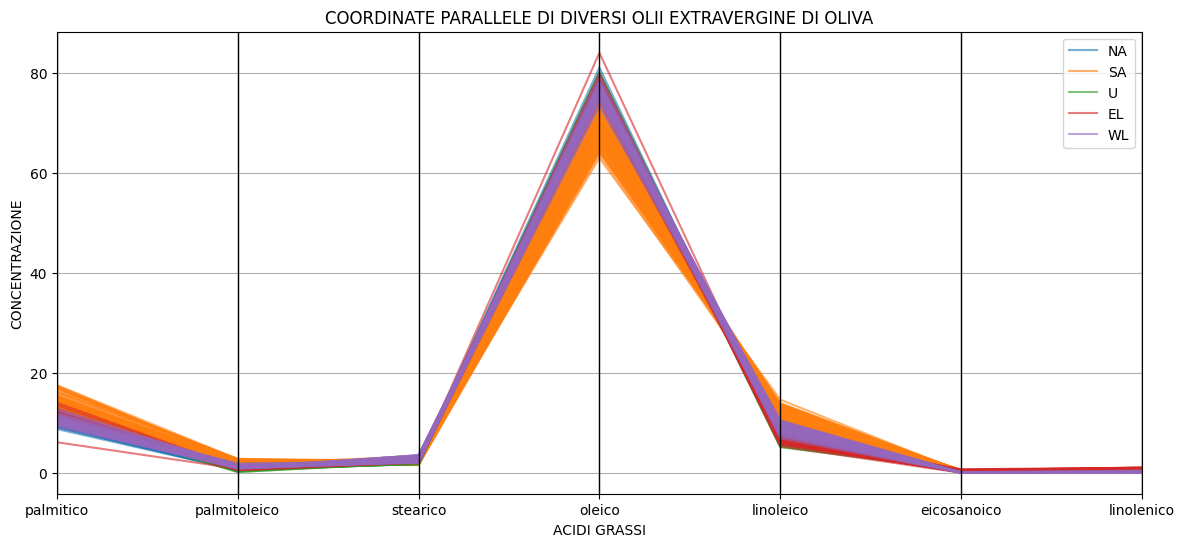

In [7]:
fig = plt.figure(figsize=(14, 6))

pd.plotting.parallel_coordinates(df, 'Categorie', cols=['palmitico', 'palmitoleico', 'stearico', 'oleico', 'linoleico', 'eicosanoico', 'linolenico'], color=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], alpha=0.6)

plt.grid(True)
plt.title('COORDINATE PARALLELE DI DIVERSI OLII EXTRAVERGINE DI OLIVA')
plt.ylabel('CONCENTRAZIONE')
plt.xlabel('ACIDI GRASSI')

Questa rappresentazione è utile per dare un'idea generale delle somiglianze e differenze tra variabili e categorie.

* Dal grafico, è evidente che l'acido oleico è una variabile chiave per distinguere le diverse categorie, come Puglia sud (arancione), Liguria est (rosso) e ovest (viola). In particolare, l'olio proveniente dalla Liguria est presenta una concentrazione molto più elevata di acido oleico rispetto ad altre categorie. Anche gli acidi palmitico e linoleico possono aiutare a distinguere tra gli olii provenienti da queste zone di provenienza, perché presentano un range di concentrazioni diverse abbastanza ampio.


* D'altra parte, gli acidi linolenico e eicosanoico, oltre ad essere concentrati a livelli molto bassi per tutte le categorie, presentano variazioni poco significative tra le categorie. Questo le rende dunque poco utili qualora si volesse individuare i differenti olii. un'altra caratteristica che condividono riguarda il fatto che sembrano avere le stesse concentrazioni o, per lo meno, le loro misurazioni sembrano non troppo distanti tra loro, ma stabili. Insomma, esse sembrano le più uniformi tra le categorie.

* Tra le meno utili per distinguere bene le categorie, si aggiunge l'acido stearico che risulta prevalentemente dominata dalla classe viola, probabilmente per via della grande varianza di questa categoria. Mi aspetto uno scatter plot molto fitto per le tre variabili stearico, eicosanoico e linolenico.


* Umbria (verde) e Puglia nord (blu) si presentano difficili da distinguere dal resto delle regioni. Si intravvedono solo alcune righe blu nell'acido palmitico e alcune verdi in quello oleico. Come accennato all'inizio, solo Puglia sud, Liguria ovest e Liguria est sono più visibili.


* Da questo grafico si può affermare che l'acido oleico sembra correlata negativamente con la variabile linoleico. Infatti, categorie con alte concentrazioni di acido oleico tendono ad avere basse concentrazioni di acido linoleico, ma altri strumenti di data visualization - specifici per individuare le correlazioni - ne daranno la conferma... dopotutto, le coordinate parallele sono solo una rappresentazione unidimensionale dei dati.

Text(0.5, 1.03, 'MATRICE DI GRAFICI A DISPERSIONE')

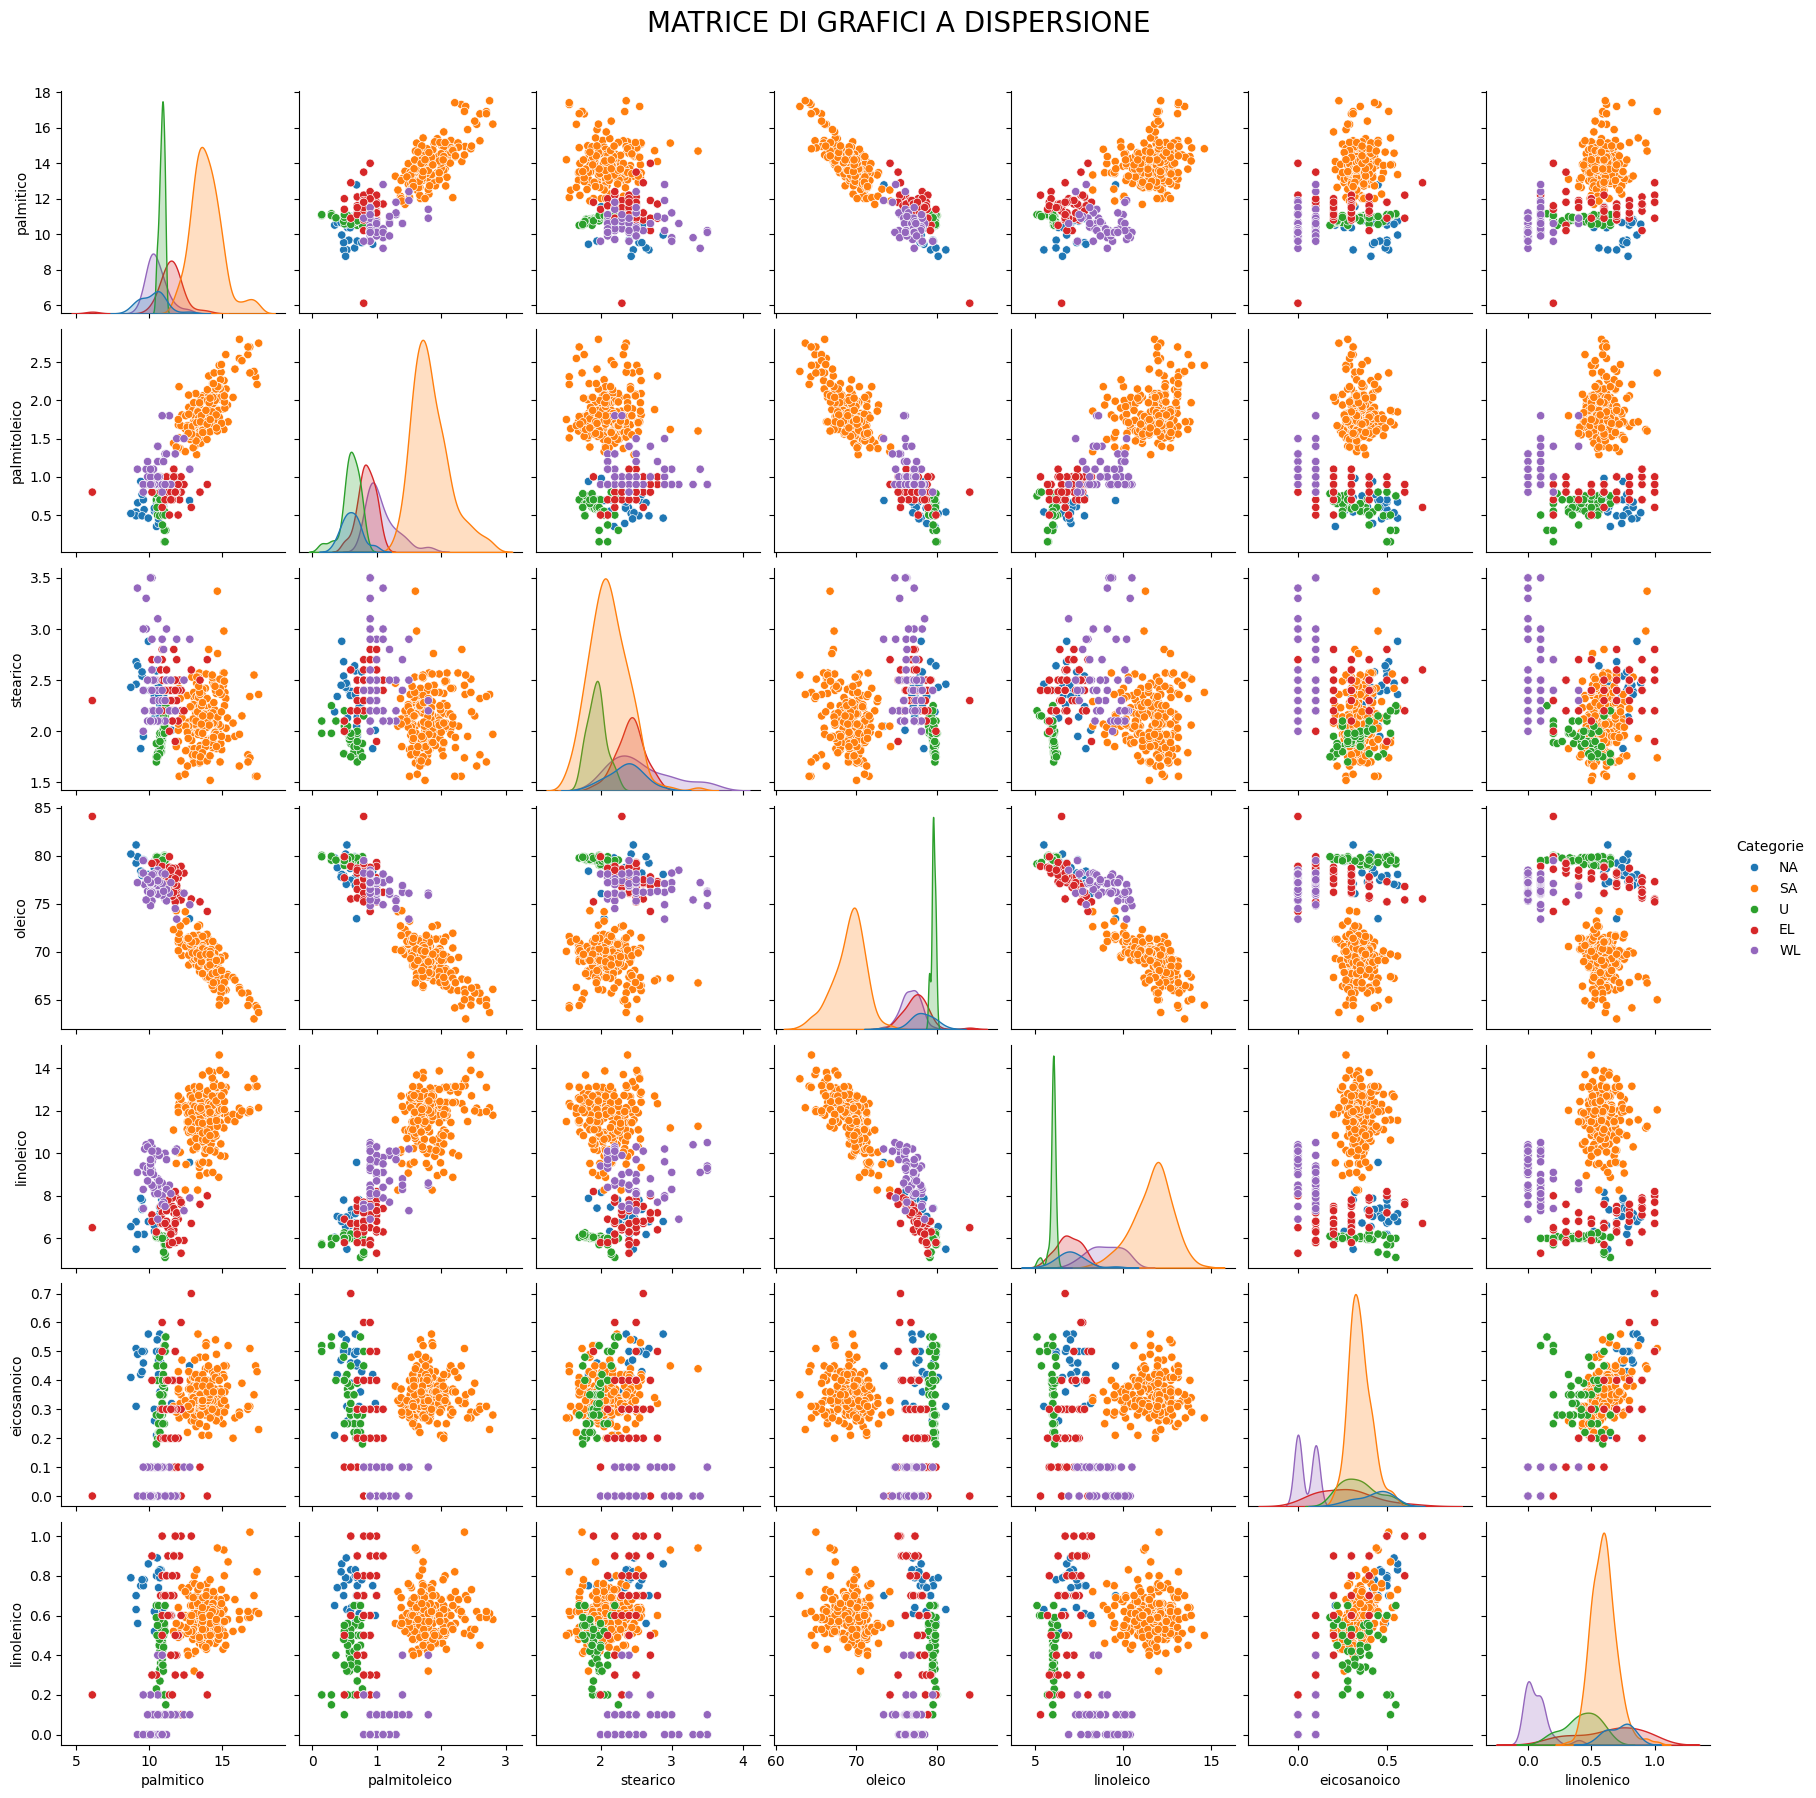

In [8]:
sns.pairplot(df, hue='Categorie')

plt.suptitle('MATRICE DI GRAFICI A DISPERSIONE', y=1.03, fontsize=20)

Le rappresentazioni grafiche risultano particolarmente utili per osservare somiglianze e differenze tra campioni, soprattutto in termini di distribuzioni e correlazioni tra variabili. Gli scatter plots specifici offrono informazioni dettagliate sulle relazioni tra variabili e sulle categorie considerate.

- Lungo la diagonale principale, notiamo che nessuna variabile ha una distribuzione normale, in quanto sono presenti molti picchi, per via delle diverse classi che la compongono, e non vi sono simmetrie, specialmente la variabile stearico, che mostra una coda a destra di lunghezza non indifferente.
  
- Al livello delle singole categorie, le distribuzioni si presentano anch'esse unimodali, asimmetriche (a sola esclusione dell'acido palmitico dell'olio umbro, di colore verde) e diverse tra loro, sebbene alcune risultino meno dissimili. Un esempio di curve poco dissili è la coppia formata dalla Liguria est (rosso) e ovest (viola), come verrà approfondito successivamente.

- Nonostante alcune curve siano sovrapposte, la categoria che rappresenta la Puglia sud (arancione) emerge chiaramente ed è facilmente distinguibile in tutti i plots, grazie alla sua alta varianza, alle posizioni occupate (con alte concentrazioni nei primi acidi grassi e bassi livelli di acido oleico) e alle frequenze spesso più elevate rispetto alle altre categorie (come succede per gli acidi palmitoleico, stearico, eicosamoico e linolenico). 

- È interessante osservare che, all'interno della stessa regione, ci siano differenze sostanziali nelle concentrazioni. Le distribuzioni delle due aree regionali della Puglia (blu per il nord e arancione per il sud) risultano infatti significativamente diverse. Mentre la curva arancione si distingue nettamente dalle altre, quella blu rimane sovrapposta ad altre categorie, rendendo più difficile identificarla.

- Un comportamento simile è osservabile anche per le zone est (rosso) e ovest (viola) della Liguria. Stavolta però, a differenza della Puglia, le distribuzioni delle due aree liguri risultano lievemente più simili tra loro. Nello specifico, per quanto riguarda gli acidi palmitico, palmitoleico e oleico, le distribuzioni tendono ad avvicinarsi sia in termini di forma che di posizione nei subplots.

- Si osserva una forte correlazione positiva tra gli acidi grassi palmitico e palmitoleico, e una correlazione debole tra palmitoleico e linoleico. Questo significa che campioni con alte concentrazioni di acido palmitoleico tendono anche a mostrare alti livelli di acido palmitico, e in misura minore, di acido linoleico.

- Al contrario, si evidenzia una correlazione inversa tra oleico e le altre variabili, come palmitico, palmitoleico e linoleico. In altre parole, campioni con alte concentrazioni di uno di questi acidi tendono ad avere bassi livelli di acido oleico. Un esempio evidente di questa dinamica si osserva nella distribuzione di Puglia sud, che mostra alte concentrazioni di palmitico e palmitoleico, ma basse concentrazioni di oleico.

- Nel grafico delle coordinate parallele, si notava un restringimento delle linee per le variabili relative agli acidi stearico, eicosanoico e linolenico, suggerendo una certa stabilità nelle osservazioni. Questo andamento costante è confermato anche dagli scatter plots di questi acidi, dove i punti tendono a disporsi linearmente lungo una singola dimensione, indicando una variazione complessiva limitata.

- Viene confermata la mia affermazione sul fatto che le variabili che mettono meno in luce le diverse categorie sono stearico, eicosanoico e linolenico. Infatti, le sovrapposizioni sono più evidenti in questi componenti dell'olio.

- Nel grafico precedente, l'Umbria appariva difficile da individuare. Tuttavia, alcune distribuzioni relative a questa regione risultano particolari. Spesso, esse si caratterizzano per la minor varianza rispetto alle altre categorie e per picchi di frequenza relativamente alti per acidi grassi come palmitico, oleico e linoleico. Questo suggerisce che, nonostante le distribuzioni umbre siano state sovrapposte ad altre categorie e non emergevano visivamente in maniera marcata nell'altro grafico, c'è una buona probabilità che campioni con determinate concentrazioni appartengano a questa regione (con un range limitato di alcune sue distribuzioni, tende a svilupparsi quasi completamente in verticale).

- Un'altra differenza che merita di essere esposta tra le due immagini è al livello della variabile stearico. Tale attributo appareva dominato dal colore viola, perché le concentrazioni di acido stearico per Liguria ovest spaziano un intervallo più ampio rispetto ad altre categorie, raggiungendo concentrazioni superiori rispetto alle altre regioni. Questo effetto visivo era amplificato dalle coordinate parallele, le quali enfatizzano le differenze di ampiezza tra i valori, e quindi, un intervallo ampio per una variabile può risultare più evidente anche se la distribuzione complessiva non è particolarmente prominente. Grazie dunque alla matrice a dispersione, il dominio di Liguria ovest l'acido stearico non risulta altrettanto evidente.

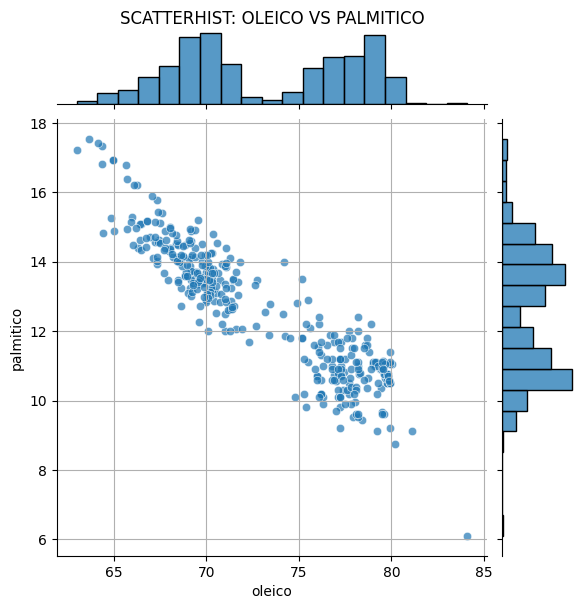

In [9]:
sns.jointplot(df, x='oleico', y='palmitico', kind="scatter", marginal_kws=dict(bins=int(np.sqrt(len(df))), fill=True), alpha=0.7)
plt.title('SCATTERHIST: OLEICO VS PALMITICO', y=1.2)
plt.grid(True)

Ho selezionato le variabili oleico e palmitico per lo scatterhist in quanto rappresentano in modo più evidente la dispersione dei dati.

Questo grafico integra due rappresentazioni: uno scatter plot al centro e due istogrammi che mostrano le distribuzioni relative agli acidi oleico e palmitico. Entrambi gli istogrammi rivelano una tendenza bimodale. L'istogramma orizzontale, relativo all'acido oleico, presenta un picco principale intorno ai 70 mg e un secondo picco inferiore poco al di sotto degli 80 mg. Ciò conferma quanto osservato nella matrice di dispersione, ovvero la presenza di due gruppi distinti nella concentrazione dell'acido oleico, caratterizzati da una frequenza relativamente elevata.

Analogamente, l'istogramma relativo all'acido palmitico mostra una leggera bimodalità, con un primo picco situato tra 10-11 mg e un secondo intorno ai 14 mg.

Dallo scatter plot si evince la presenza di due cluster distinti, che suggeriscono l'esistenza di due macro-gruppi nel dataset, differenziati principalmente per le concentrazioni degli acidi grassi considerati. Inoltre, è possibile notare un punto isolato nella parte bassa a sinistra, che potrebbe indicare la presenza di un outlier.

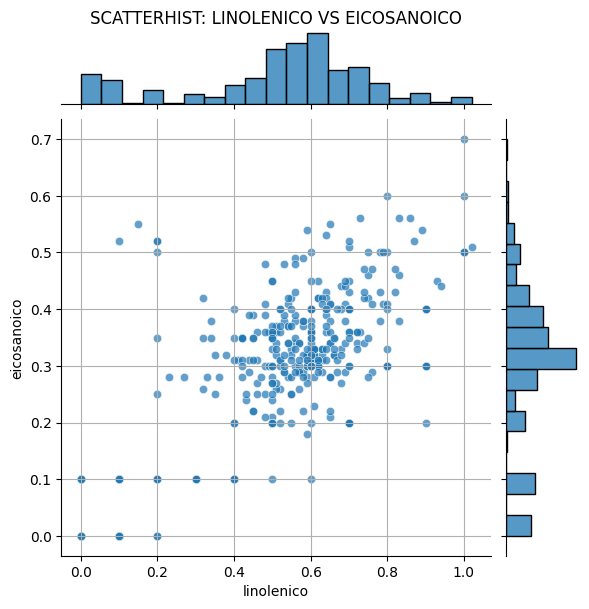

In [10]:
sns.jointplot(df, x='linolenico', y='eicosanoico', kind="scatter", marginal_kws=dict(bins=int(np.sqrt(len(df))), fill=True), alpha=0.7)
plt.title('SCATTERHIST: LINOLENICO VS EICOSANOICO', y=1.2)
plt.grid(True)

In contrapposizione al grafico precedente, ho scelto le variabili linolenico ed eicosanoico per il secondo scatterhist, con l'obiettivo di mostrare un esempio di distribuzione con minore dispersione e pattern meno evidenti. Come previsto, questo grafico fornisce informazioni meno rilevanti, probabilmente a causa di una dispersione dei dati più contenuta.

Le distribuzioni degli acidi linolenico ed eicosanoico risultano unimodali, con picchi rispettivamente intorno a 0.6 mg e 0.3 mg. Non è evidente una correlazione significativa tra i livelli di questi due acidi, poiché i punti appaiono piuttosto dispersi, suggerendo l'assenza di una forte relazione lineare.

Nonostante la mancanza di una chiara relazione, si nota una certa concentrazione centrale dei dati, con pochi punti isolati nella parte bassa del grafico, il che potrebbe indicare la presenza di un piccolo sottogruppo di osservazioni anomale.

In conclusione, come ipotizzato, il secondo grafico non evidenzia gruppi ben definiti, e i pattern risultano meno marcati rispetto al primo scatterhist.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

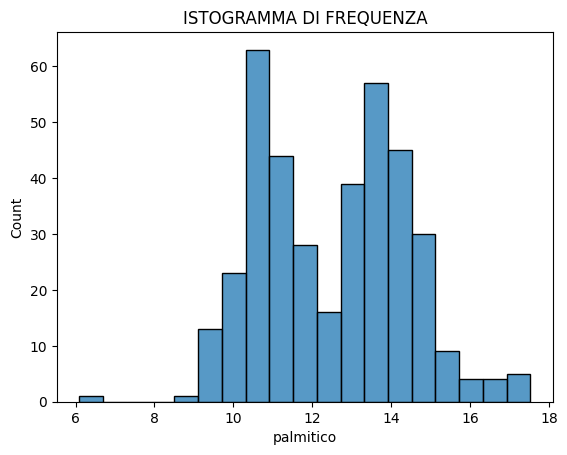

In [11]:
sns.histplot(df['palmitico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

Il grafico a barre dell'acido palmitico evidenzia in maniera più chiara alcune caratteristiche che risultavano meno evidenti nel primo scatter-hist. In particolare, si nota la netta predominanza della moda, situata a circa 10 mg, rispetto a un secondo picco vicino ai 14 mg. La presenza di due picchi distinti indica chiaramente l'esistenza di più gruppi nella distribuzione. Inoltre, vi è un possibile outlier rilevabile alle basse concentrazioni di acido palmitico.

In conclusione, la distribuzione si presenta asimmetrica, con un range compreso tra 6 mg e 18 mg. Le code sinistra e destra risultano appiattite, suggerendo che le concentrazioni estreme di questo acido sono rare nel campione.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

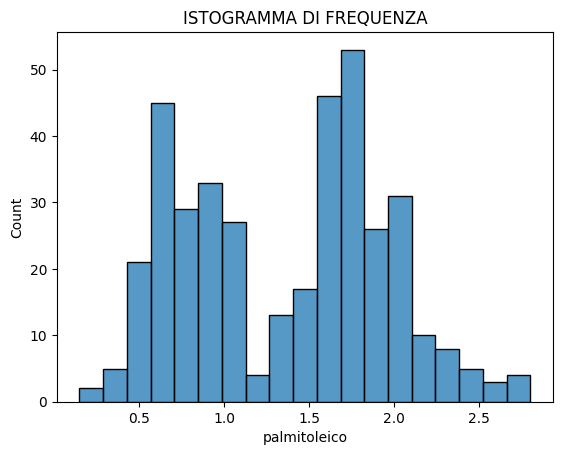

In [12]:
sns.histplot(df['palmitoleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

La distribuzione si estende da poco più di 0 mg a meno di 3 mg, e appare asimmetrica e bimodale. La moda principale si colloca tra 1.5 mg e 2.0 mg, mentre un secondo picco minore si trova intorno a 0.5 mg. Anche in questo caso, la presenza di due picchi suggerisce l'esistenza di più gruppi nella popolazione. Non sembrano esserci outlier evidenti in questa distribuzione.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

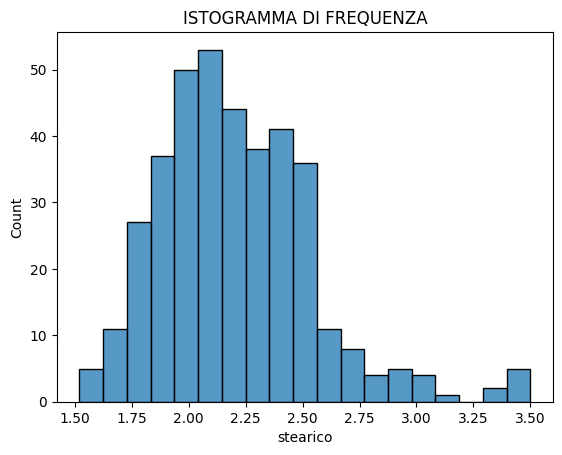

In [13]:
sns.histplot(df['stearico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

La distribuzione dell'acido stearico si estende da 1.5 mg a meno di 3.5 mg e presenta una forma unimodale, con la moda localizzata tra 2.0 mg e 2.25 mg. Si osserva una forte concentrazione di olii nell'intervallo tra 1.75 mg e 2.5 mg, con la presenza di picchi secondari che si formano intorno alla moda. Tuttavia, è possibile individuare un gruppo separato dal resto, rappresentato da osservazioni con concentrazioni superiori ai 3.25 mg.

Questa distribuzione risulta essere la meno asimmetrica rispetto a tutte le variabili perché è quella che si avvicina meglio ad una distribuzione normale. A differenza delle distribuzioni dell'acido palmitico e palmitoleico, non si rilevano chiari indizi di clustering in questo caso, il che potrebbe suggerire una maggiore omogeneità nella distribuzione complessiva.

Tuttavia, analizzando la distribuzione a un livello più dettagliato (ad esempio, attraverso la matrice di dispersione), emerge che la Puglia sud domina notevolmente la distribuzione, conferendo una forma più sinuosa alla stessa. Questo fenomeno deriva dal fatto che c'è una maggior sovrapposizione tra Puglia sud e gli altri sottogruppi.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

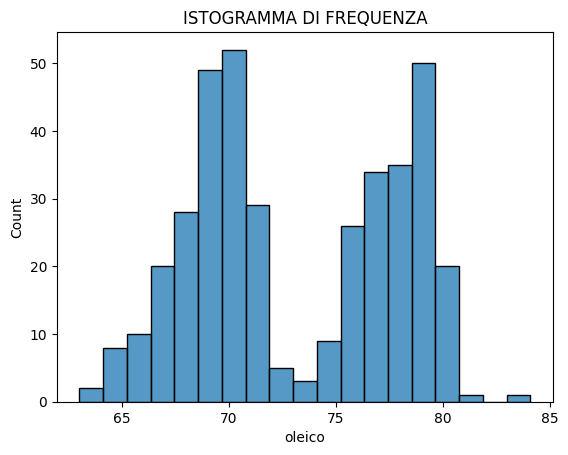

In [14]:
sns.histplot(df['oleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

Tra gli acidi, l'acido oleico si distingue per la sua elevata concentrazione. La sua distribuzione è caratterizzata da un'ampia gamma, che va da poco meno di 65 mg a quasi 85 mg, presentando un profilo asimmetrico e unimodale, con una norma situata attorno ai 70 mg. Si possono identificare chiaramente due macro-sottogruppi di dati, separati da un confine intorno ai 73 mg. All'interno di ciascun sottoinsieme, emergono diversi picchi secondari. Inoltre, si sospetta la presenza di un outlier oltre gli 80 mg. In conclusione, l'acido grasso oleico si conferma come la variabile che consente di osservare chiaramente la presenza di diverse classi di dati.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

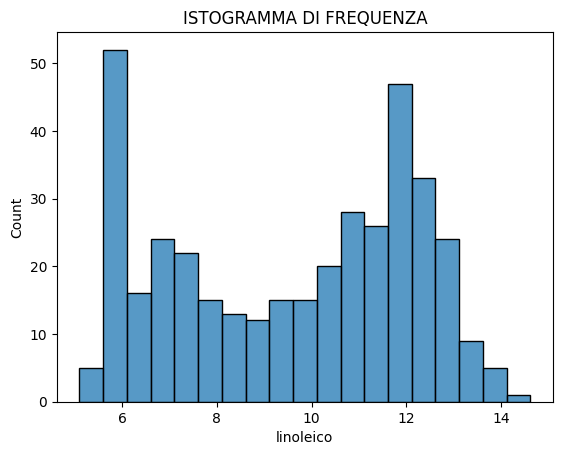

In [15]:
sns.histplot(df['linoleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

Per quanto riguarda l'acido grasso linoleico, la distribuzione si estende da circa 5 mg a poco oltre 14 mg, presentando una forma asimmetrica e unimodale, con la modalità che si posiziona intorno ai 6 mg. In questo caso, si possono identificare due macro sottogruppi di dati, sebbene il confine tra di essi sia meno definito e appaia più "sfumato". Un secondo picco significativo si osserva a circa 12 mg.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

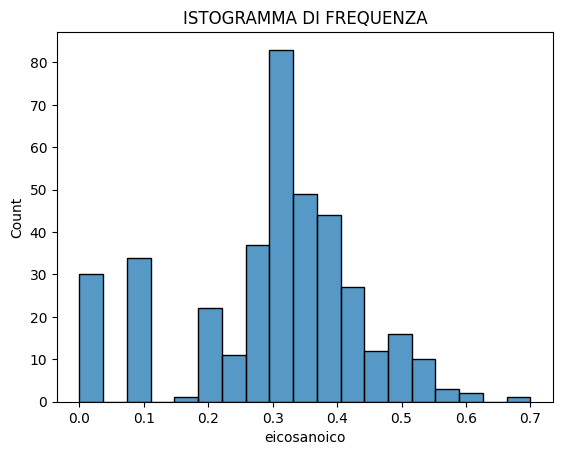

In [16]:
sns.histplot(df['eicosanoico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

Riguardo all'acido grasso linoleico, la distribuzione è fortemente discreta, con valori molto limitati compresi tra 0 mg e 0.7 mg. Essa presenta un andamento asimmetrico e unimodale, con un picco dominante attorno ai 0.3 mg. Con mia sorpresa, l'istogramma di questa variabile evidenzia chiaramente la presenza di più di due categorie di appartenenza degli oli. Negli altri grafici, invece, l'acido eicosanoico non si rivela particolarmente interessante. Infine, risulta essere uno dei meno concentrati negli oli extravergine di oliva.

Text(0.5, 1.0, 'ISTOGRAMMA DI FREQUENZA')

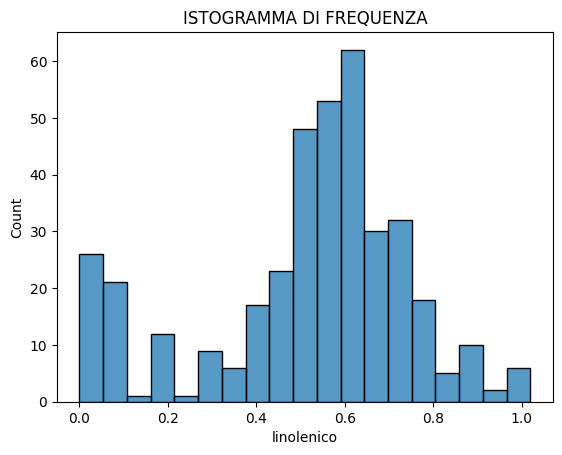

In [17]:
sns.histplot(df['linolenico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('ISTOGRAMMA DI FREQUENZA')

La distribuzione dell'acido linolenico varia da 0 mg a 1,0 mg ed è caratterizzata da un andamento asimmetrico e unimodale, con un picco situato attorno a 0,6 mg. Si osserva una forte concentrazione di valori intorno alla moda. Rispetto al grafico precedente, è meno evidente la presenza di numerose categorie. Insieme all'acido eicosanoico, l'acido linolenico è poco presente negli oli.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO PALMITICO IN FUNZIONE DELLA REGIONE")

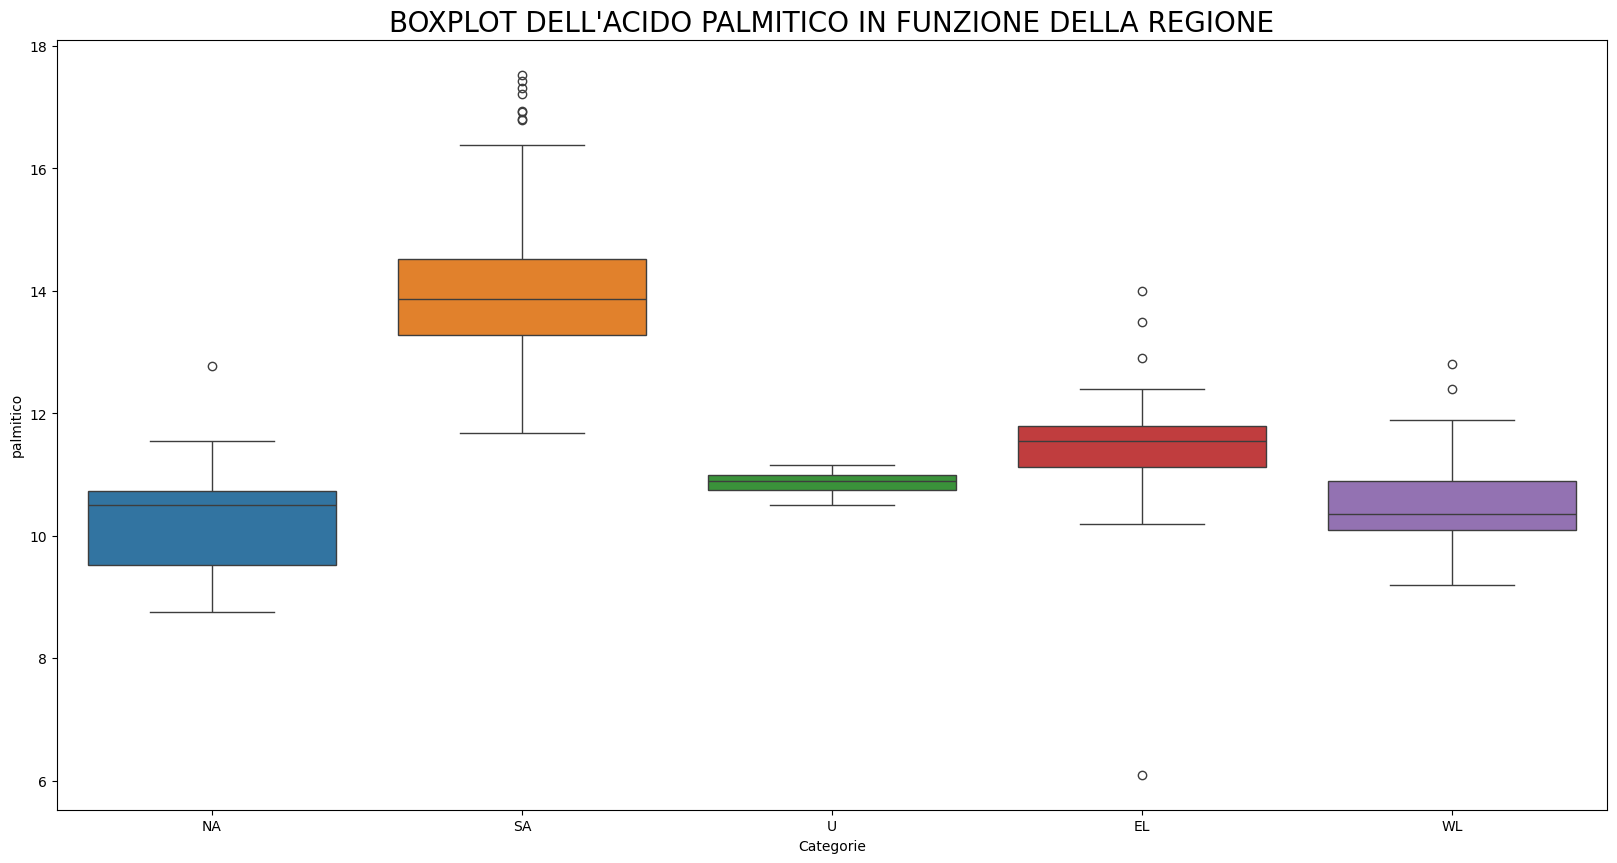

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='palmitico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO PALMITICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Con l'analisi dei boxplot, intendo confrontare le distribuzioni interne di ciascuna categoria, al fine di identificare con maggiore precisione i valori estremi. Questo approccio consente di passare da una visione globale delle distribuzioni a un'analisi più locale, concentrandosi sulle singole regioni. Inizio con l'acido palmitico:

La distribuzione più simmetrica è quella dell'Umbria (U), poiché la mediana divide perfettamente l'IQR della "scatola" e non presenta punti estremi. Sebbene questa distribuzione mostri una leggera asimmetria verso sinistra, evidenziata dal fatto che il whisker inferiore è leggermente più lungo di quello superiore, suggerisce la presenza di una coda sinistra lievemente più estesa. Come già menzionato, l'Umbria presenta valori concentrati attorno a un intervallo relativamente stretto rispetto alle altre regioni, risultando in un boxplot molto appiattito.

La regione sud pugliese (SA) segue a ruota, con una "scatola" anch'essa perfettamente divisa dalla mediana. L'asimmetria di questa distribuzione è accentuata dalla lieve estensione del baffo superiore e, in particolare, dalla presenza di outlier che si diramano verso l'alto.

Escludendo queste due regioni, tutte le altre mostrano una marcata asimmetria. Tra le distribuzioni più fortemente asimmetriche spicca quella della Puglia Nord (NA), che presenta una skewness molto negativa; in questo caso, la mediana è spostata verso destra, avvicinandosi al baffo superiore. Questa distribuzione è interessante perché, solitamente, le distribuzioni con skewness negativa tendono a presentare lunghe code con possibili outlier a sinistra, mentre quella rappresentata nel grafico mostra un outlier a destra senza una coda significativa. La "scatola" sembra invece essere perfettamente centrata tra le sue estensioni inferiore e superiore. Insieme a SA, NA mostra un'alta varianza dei dati.

Una situazione simile si riscontra in Liguria Est, che presenta addirittura outlier sia a sinistra che a destra, con una coda più lunga verso sinistra. Sebbene la varianza sia contenuta, non raggiunge i livelli di quella dell'Umbria.

L'unica distribuzione con skewness positiva è quella di Liguria Ovest, che presenta caratteristiche tipiche di una distribuzione asimmetrica positiva: la mediana è spostata a sinistra e gli outlier si trovano a destra. Anche per questa distribuzione, la varianza si mantiene a livelli moderati.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO PALMITOLEICO IN FUNZIONE DELLA REGIONE")

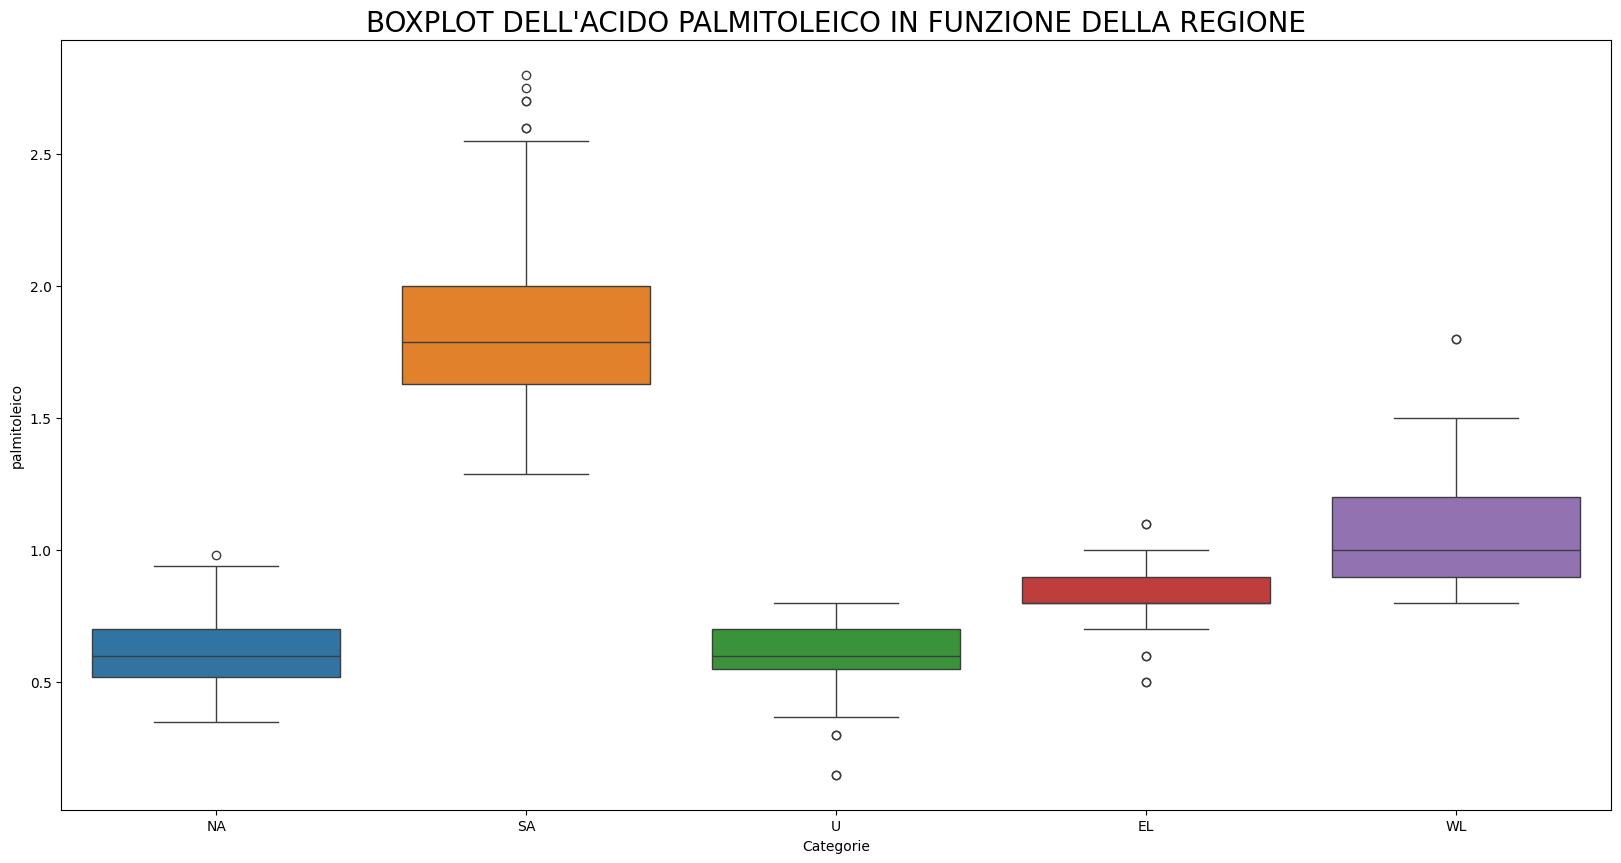

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='palmitoleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO PALMITOLEICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Per quanto riguarda l'acido palmitoleico, nessuna regione presenta una distribuzione simmetrica.

La regione di Udine, che nel grafico del palmitico appariva simmetrica, si presenta ora con una distribuzione asimmetrica, tendenzialmente negativa, caratterizzata da una coda lunga a sinistra in cui si individuano due outlier. Inoltre, la mediana non è più centrata, risultando spostata verso sinistra, un comportamento atipico per distribuzioni negativamente asimmetriche.

Il comportamento positivamente asimmetrico dell'area meridionale della Puglia, che continua a dominare tutte le altre con la sua elevata varianza, è particolarmente evidente nell'acido palmitoleico. Qui, la mediana è collocata vicino all'estremo sinistro del box, con una coda lunga verso i valori superiori e la presenza di outlier a destra.

La regione "blu", al contrario, appare più schiacciata rispetto all'altro acido, con una mediana inclinata verso sinistra. Tuttavia, rimane invariata la presenza del suo unico outlier.

Anche Liguria Est ha subito cambiamenti. Se in precedenza presentava un numero significativamente maggiore di outlier in alto, ora la situazione è opposta. Un notevole cambiamento è osservabile nella "scatola", dove la mediana risulta difficile da individuare, essendo quasi coincidente con uno dei bordi. Inoltre, in questa fase, Liguria Est mostra anche la varianza più ridotta.

Liguria Ovest, invece, non ha subito grandi mutamenti, se non un incremento della varianza. Essa continua a presentarsi con una forte asimmetria positiva. Insieme a Sud Italia e Napoli, Liguria Ovest esemplifica chiaramente la skewness positiva: non solo la mediana è spostata verso sinistra, non solo gli outlier si trovano a destra, ma la coda destra è anche più pronunciata rispetto a quella sinistra, un aspetto che non era molto evidente nel primo grafico.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO STEARICO IN FUNZIONE DELLA REGIONE")

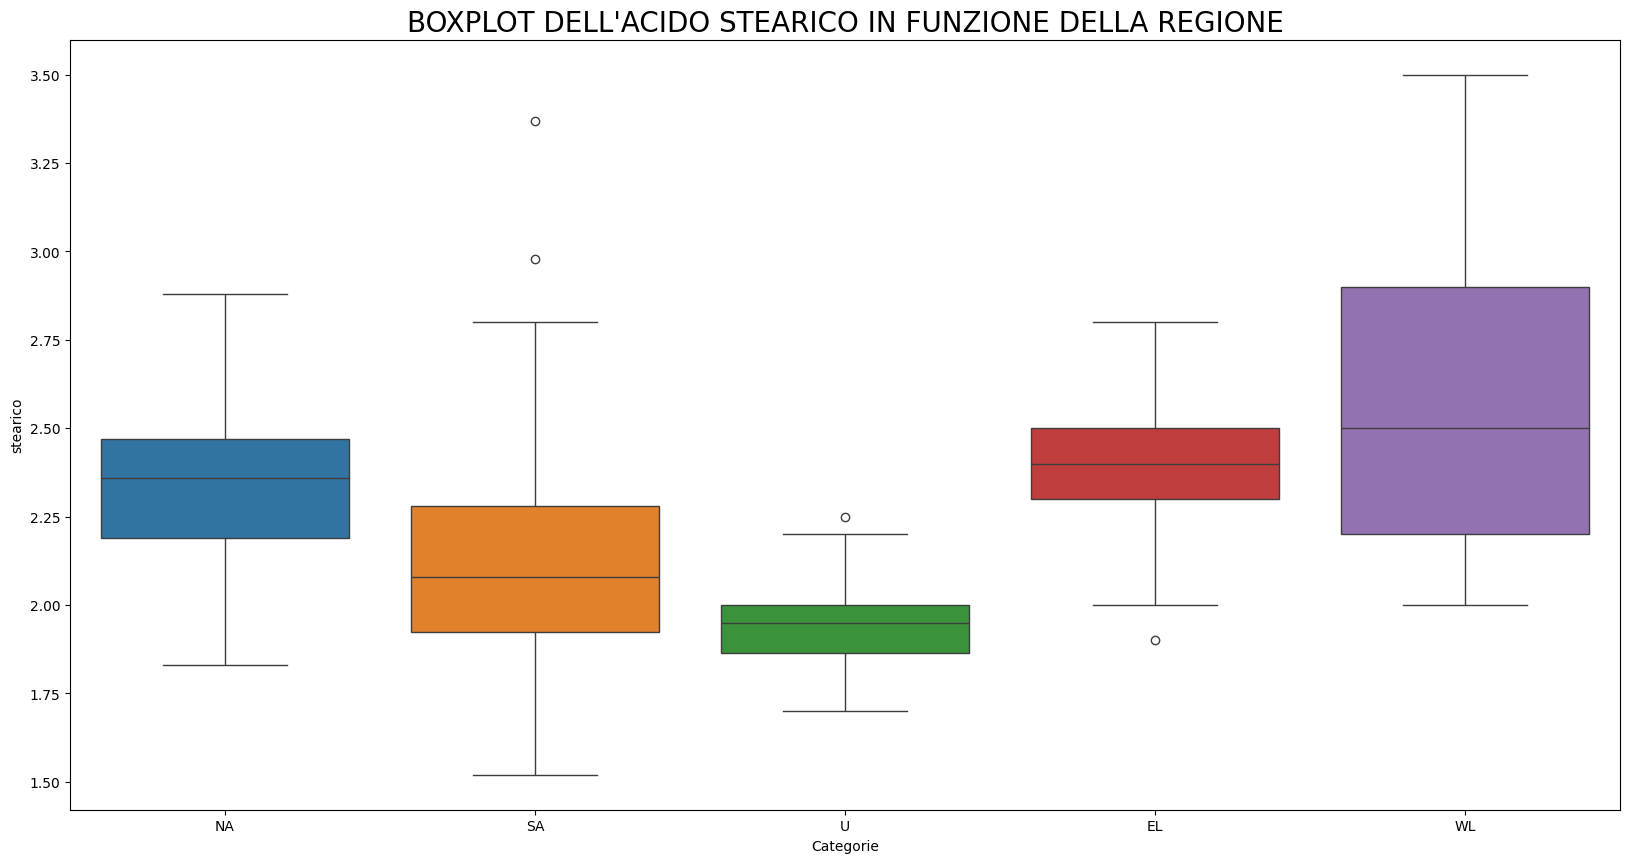

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='stearico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO STEARICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Anche per l'acido stearico, nessuna regione presenta una distribuzione significativamente simmetrica.

La distribuzione verde (Udine) mostra caratteristiche di entrambi i tipi di asimmetria: la mediana è spostata a destra, indicativa di un'asimmetria negativa, mentre gli outlier raggiungono valori elevati, tipici di un'asimmetria positiva.

Come evidenziato negli istogrammi di questa variabile, i veri protagonisti che conferiscono una forma quasi sinuosa alla distribuzione complessiva di questo acido sono SA (arancione) e WL (viola). Infatti, notiamo che la distribuzione molto "ampia" di SA, che occupa posizioni medio-basse nel livello di acido stearico, "copre" quasi tutte le altre, mentre la coda della distribuzione totale è prevalentemente determinata da quella viola, che raggiunge concentrazioni elevate. Tuttavia, al di là della posizione occupata e del ridotto numero di outlier, il boxplot di SA non subisce significative alterazioni nella sua distribuzione.

La regione "blu", oltre a un incremento della varianza, non presenta outlier.

Al contrario, l'area orientale della Liguria ha subito notevoli cambiamenti. Infatti, se non fosse per l'unico valore estremo in basso, la sua distribuzione tenderebbe a essere più simmetrica.

Una regione che ha mostrato grandi variazioni in termini di varianza è la Liguria occidentale. Essa si classifica tra le più estese, con un significativo aumento della dimensione. Questa è sicuramente la ragione per cui, per la variabile stearico, si osservano quasi tutte le linee viola nelle coordinate parallele.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO OLEICO IN FUNZIONE DELLA REGIONE")

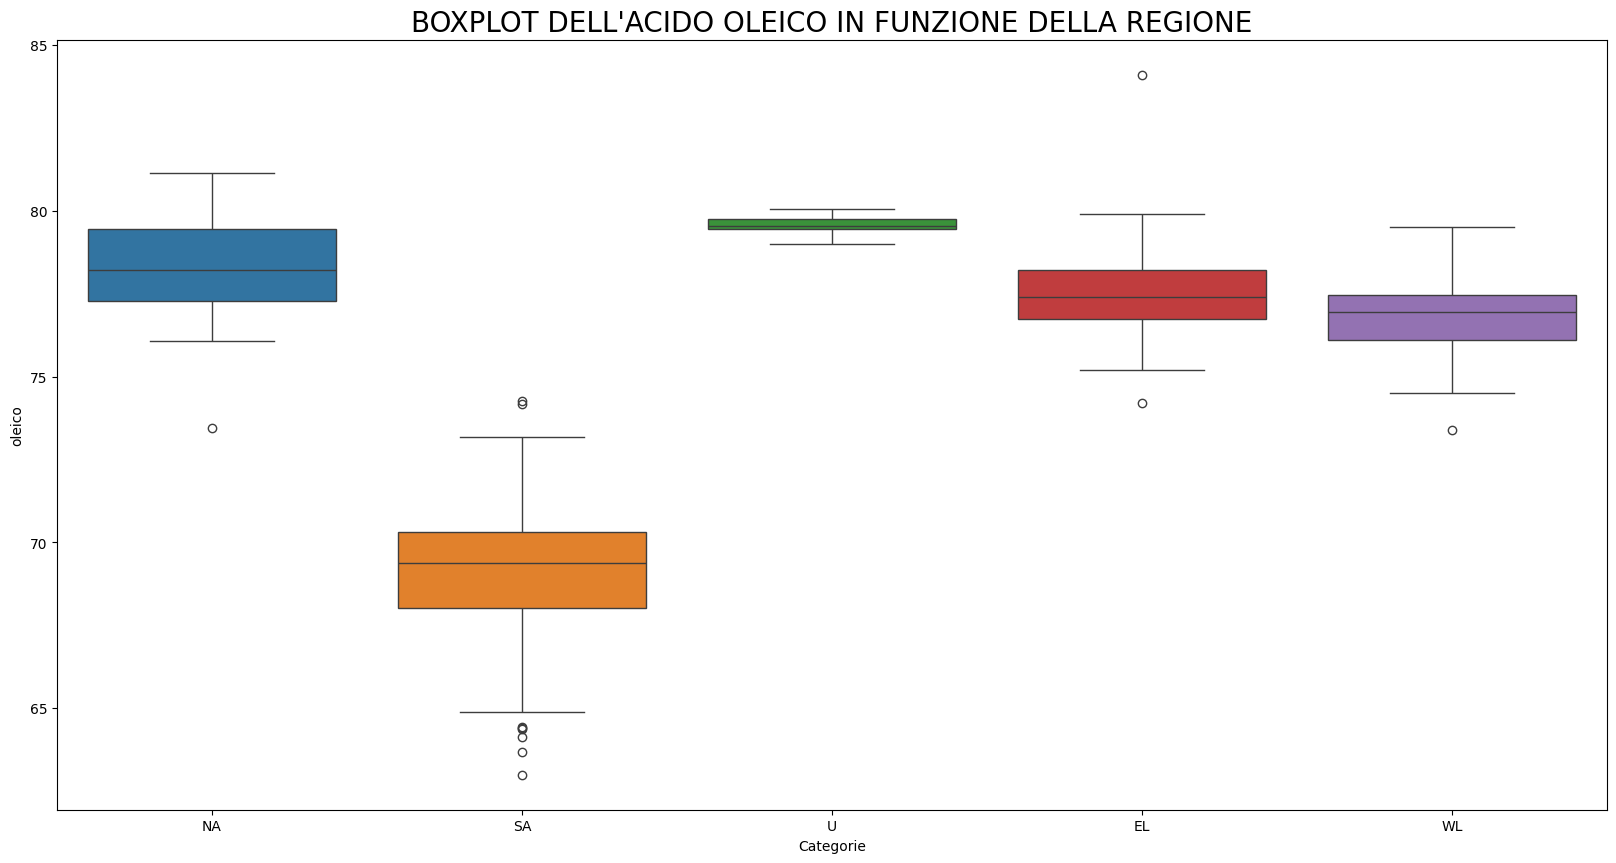

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='oleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO OLEICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Per quanto riguarda l'acido oleico, nessuna regione presenta una distribuzione significativamente simmetrica. Ciò che salta all'occhio è che la situazione osservata nei grafici relativi all'acido palmitoleico e/o palmitico sembra essere invertita per l'acido oleico. Questo non mi sorprende, poiché, come indicato dalle coordinate parallele e, in particolare, dalla matrice degli scatter plot, le alte concentrazioni di alcuni acidi, come il palmitoleico e il palmitico, corrispondono a bassi livelli di acido oleico. In altre parole, tutti i boxplot che si trovavano nella parte bassa dei grafici di questi due acidi grassi ora occupano posizioni elevate, e viceversa.

La distribuzione udinese torna a mostrare una forma simile a quella iniziale, ma con una minore simmetria, a causa della posizione della mediana, che tende verso sinistra all'interno della scatola.

Si osserva un netto distacco dell'acido stearico (SA) rispetto a tutte le altre. La skewness di questo acido passa da positiva a negativa, con l'aggiunta di un singolo outlier a sinistra. Il colore predominante nelle coordinate parallele è l'arancione, a causa della lunga coda sinistra.

Confrontando la distribuzione dell'acido oleico con quella dell'acido palmitoleico, la regione "blu" risulta invertita, ad eccezione della mediana, che rimane ancora vicina al bordo inferiore del box.

Inoltre, se non fosse per i valori estremi, sia in basso che in alto, la distribuzione rossa tenderebbe a presentare una forma più simmetrica.

Non ci sono particolari osservazioni da fare riguardo alla distribuzione dell'acido oleico in Liguria Ovest, che, tra le altre, si conferma come la migliore rappresentazione di skewness negativa.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO LINOLEICO IN FUNZIONE DELLA REGIONE")

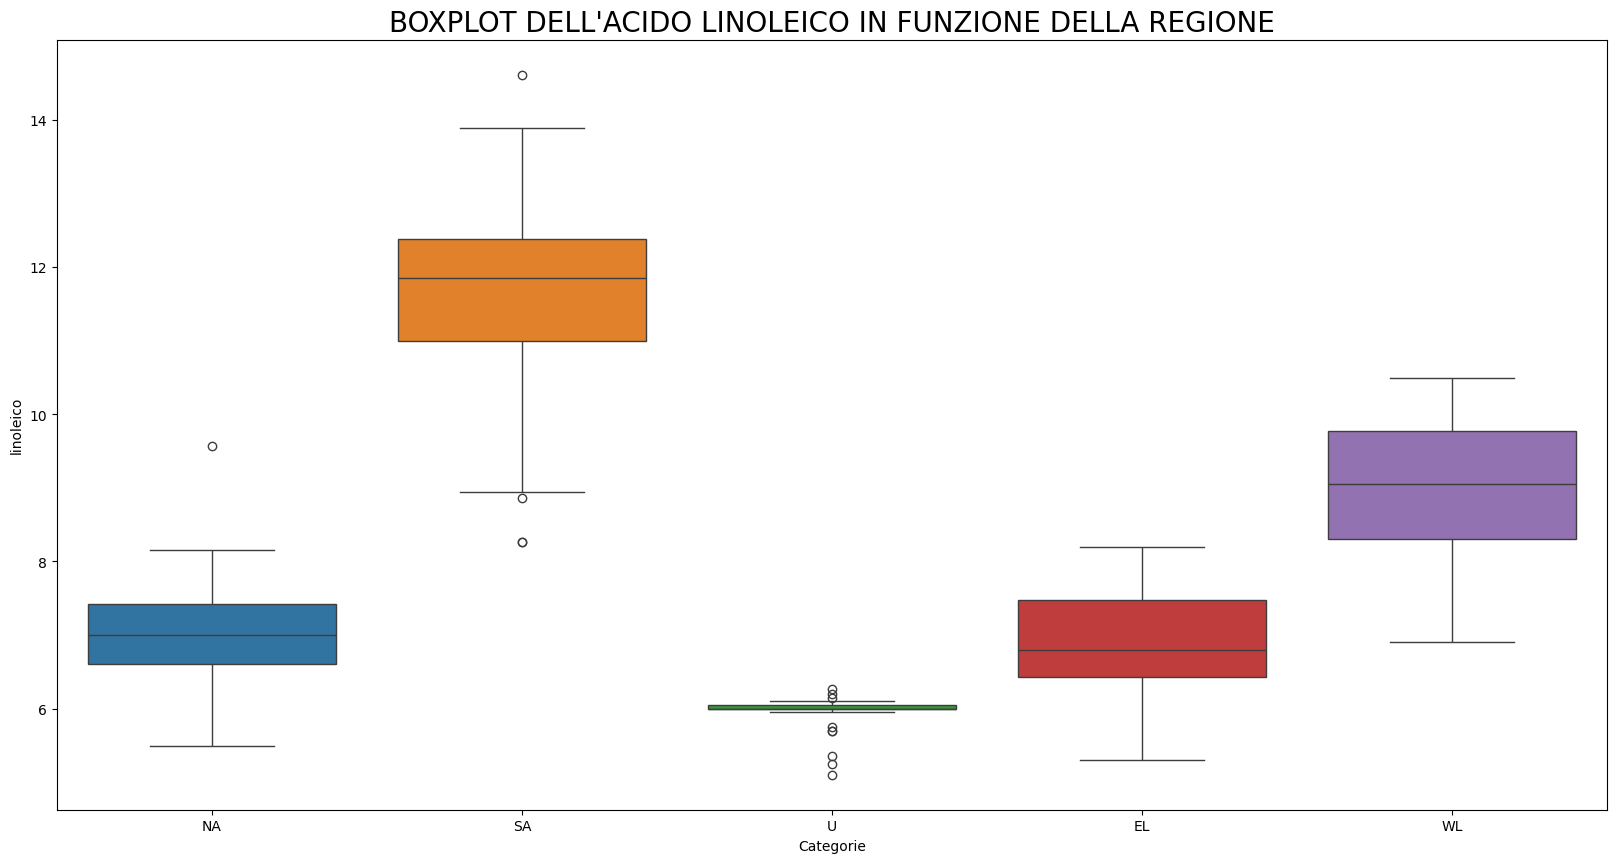

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='linoleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO LINOLEICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Tutte le regioni tornano ad apparire in basso, ad eccezione di SA, che si posiziona in alto. Come sempre, si osserva l'assenza di distribuzioni simmetriche.

La categoria U si rivela nuovamente interessante, poiché la sua distribuzione risulta la più schiacciata tra tutte le regioni, sia per questo acido che per gli altri. Inoltre, a causa della vicinanza dei suoi whisker, è difficile individuare la linea della mediana, mentre si notano numerosi outlier su entrambi i lati.

Si evidenzia un netto distacco di SA rispetto alle altre regioni, ma la skewness della sua distribuzione passa da positiva a negativa, con l'aggiunta di un singolo outlier alto.

La peculiarità di NA risiede nell'insolito comportamento della sua distribuzione: presenta una coda sinistra più lunga (tipica di una skewness negativa), con media e mediana che coincidono (indicando simmetria) e un outlier visibile in alto, caratteristico di una skewness positiva.

Per la prima volta, la distribuzione rossa si presenta priva di outlier.

Nessuna particolare novità per la Liguria ovest, che continua a rappresentare una chiara skewness negativa.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO EICOSANOICO IN FUNZIONE DELLA REGIONE")

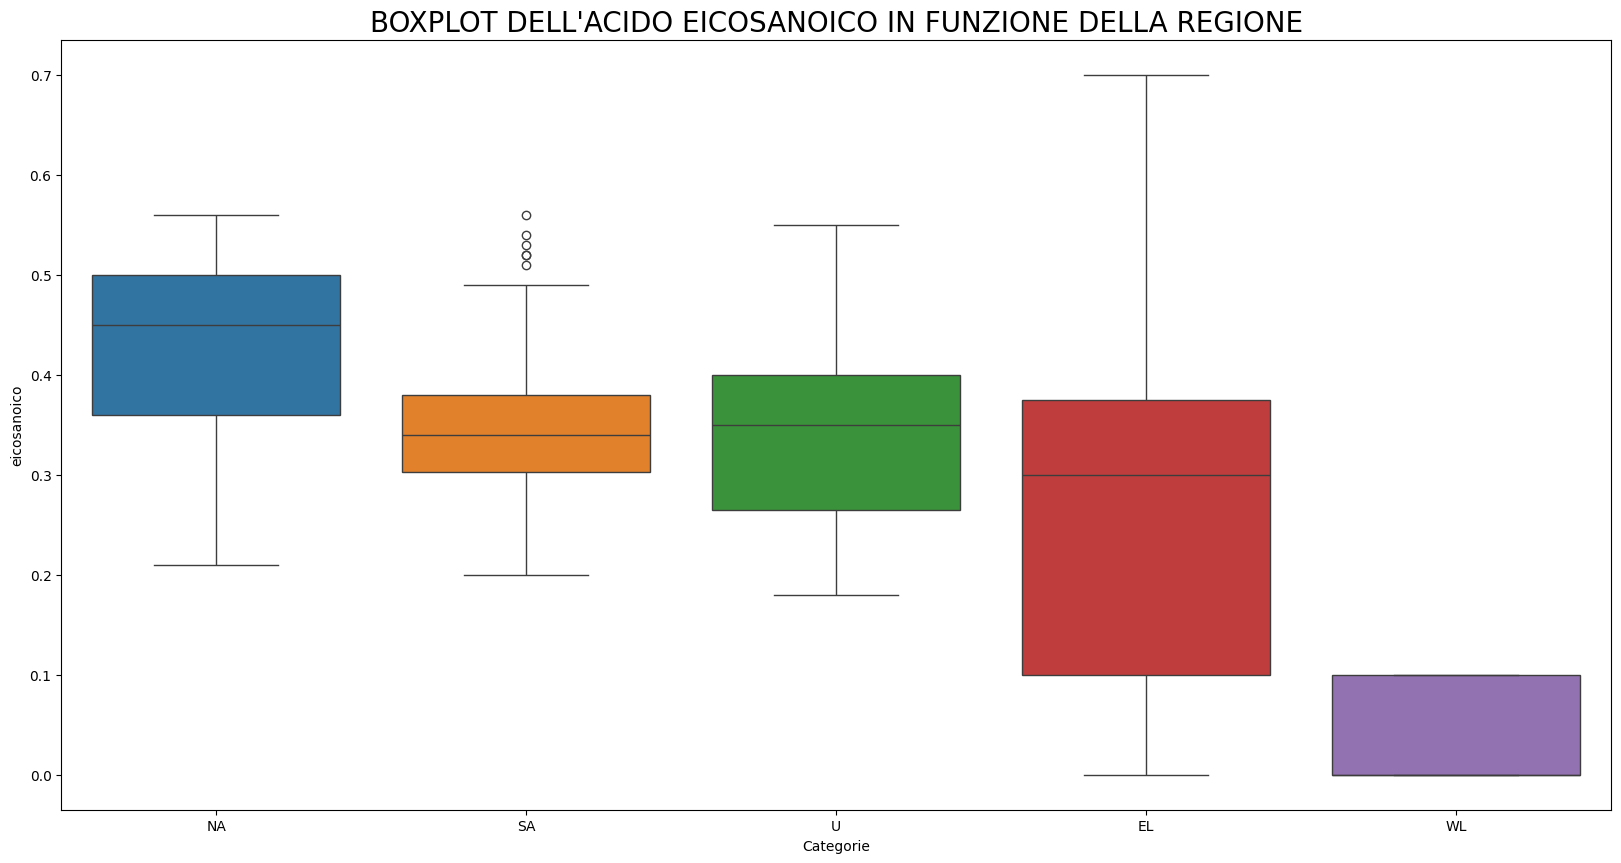

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='eicosanoico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO EICOSANOICO IN FUNZIONE DELLA REGIONE", fontsize=20)

La particolarità di questo grafico è l'alta concentrazione di osservazioni in un intervallo di dati molto ristretto, compreso tra 0,0 mg e 0,7 mg. Sebbene le dimensioni dei boxplot possano farci pensare, a un primo sguardo, che la varianza sia significativamente aumentata per tutte le regioni, in realtà le loro "larghezze" apparirebbero infinitesimali se confrontate con quelle di altri acidi.

Si possono fare alcune osservazioni importanti: mancano i valori estremi in quasi tutte le distribuzioni, ad eccezione di quella arancione. Inoltre, Liguria ovest si comporta in modo decisamente insolito per la prima volta, mentre SA si allinea al resto del gruppo.

Le categorie U ed EL mostrano un comportamento simile, differendo solo per la varianza, che, come ho già sottolineato, non è molto ampia nell’eicosanoico.

Come accennato, SA non è più disgiunta dalle altre categorie; torna a presentare una skewness positiva ed è l'unica a mostrare degli outlier.

NA prende il posto di WL come miglior rappresentazione di distribuzione asimmetrica.

La distribuzione rossa si distingue per la sua dimensione, risultando relativamente simile a quella verde; infatti, entrambe hanno mediane vicine al bordo superiore, ma presentano una coda destra più lunga.

Più interessante è il box viola, che si trova a un livello più basso. I suoi "baffi" sono collassati sui bordi inferiore e superiore della "scatola", e la sua mediana non è visibile.

Text(0.5, 1.0, "BOXPLOT DELL'ACIDO LINOLENICO IN FUNZIONE DELLA REGIONE")

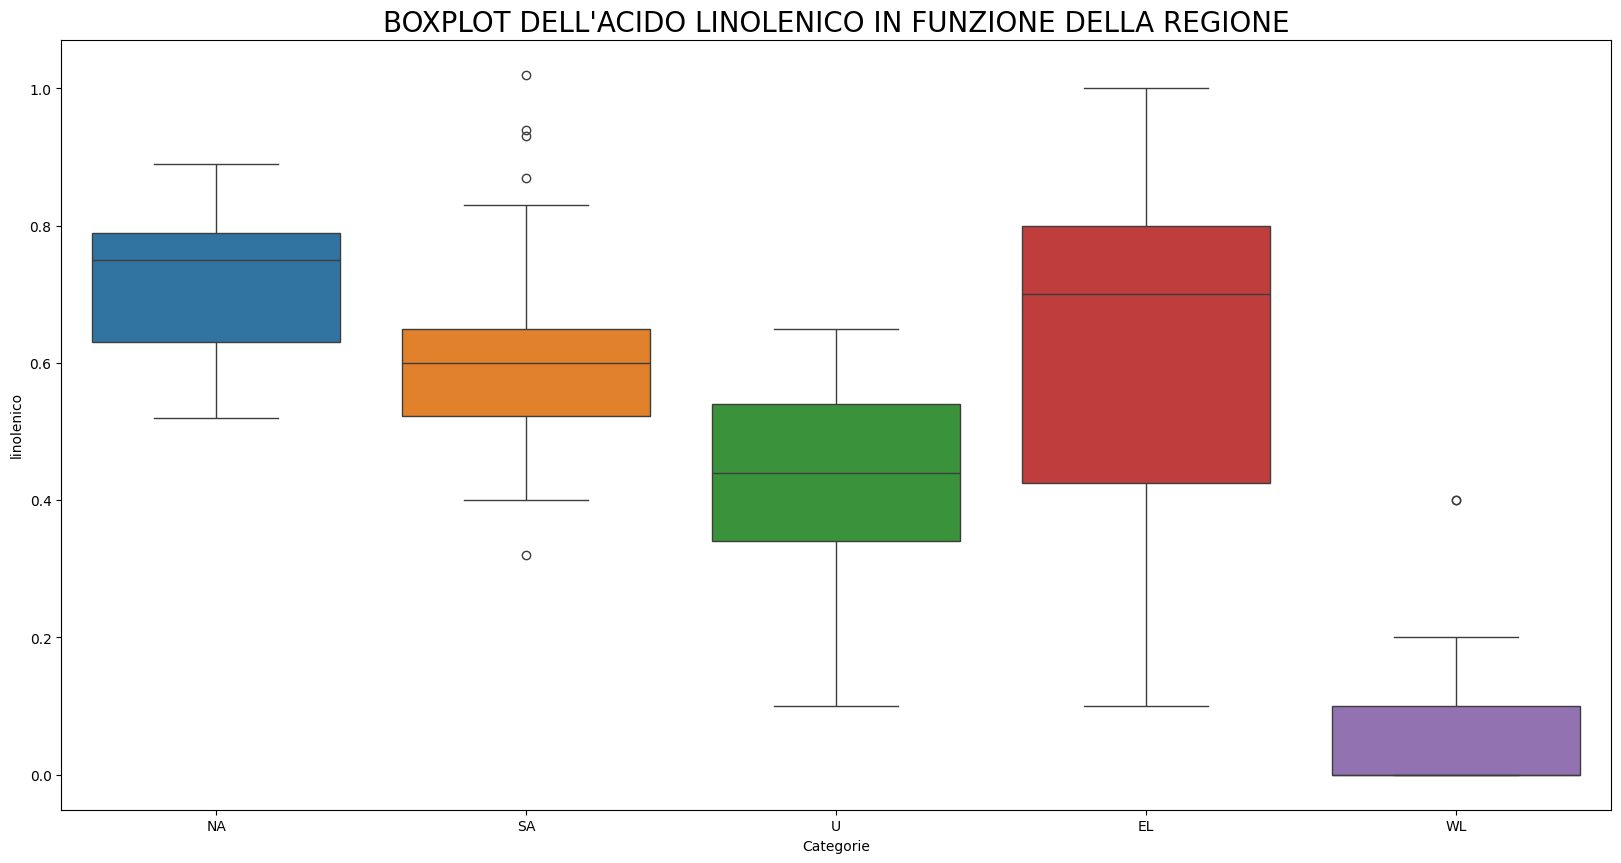

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='linolenico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT DELL'ACIDO LINOLENICO IN FUNZIONE DELLA REGIONE", fontsize=20)

Come per l'esanoico, anche l'acido linolenico è presente in quantità limitate negli oli. Infatti, il range delle misurazioni è compreso tra il valore nullo e un massimo di 1.0 mg.

Le disposizioni dei boxplot presentano somiglianze rispetto a quelle precedenti.

Il box relativo alla Liguria ovest si distingue nuovamente per la sua forma particolare, con il whisker inferiore che si posiziona sul bordo inferiore.

Text(0.5, 1.0, 'IMAGESC/HEATMAP SENZA NORMALIZZAZIONE')

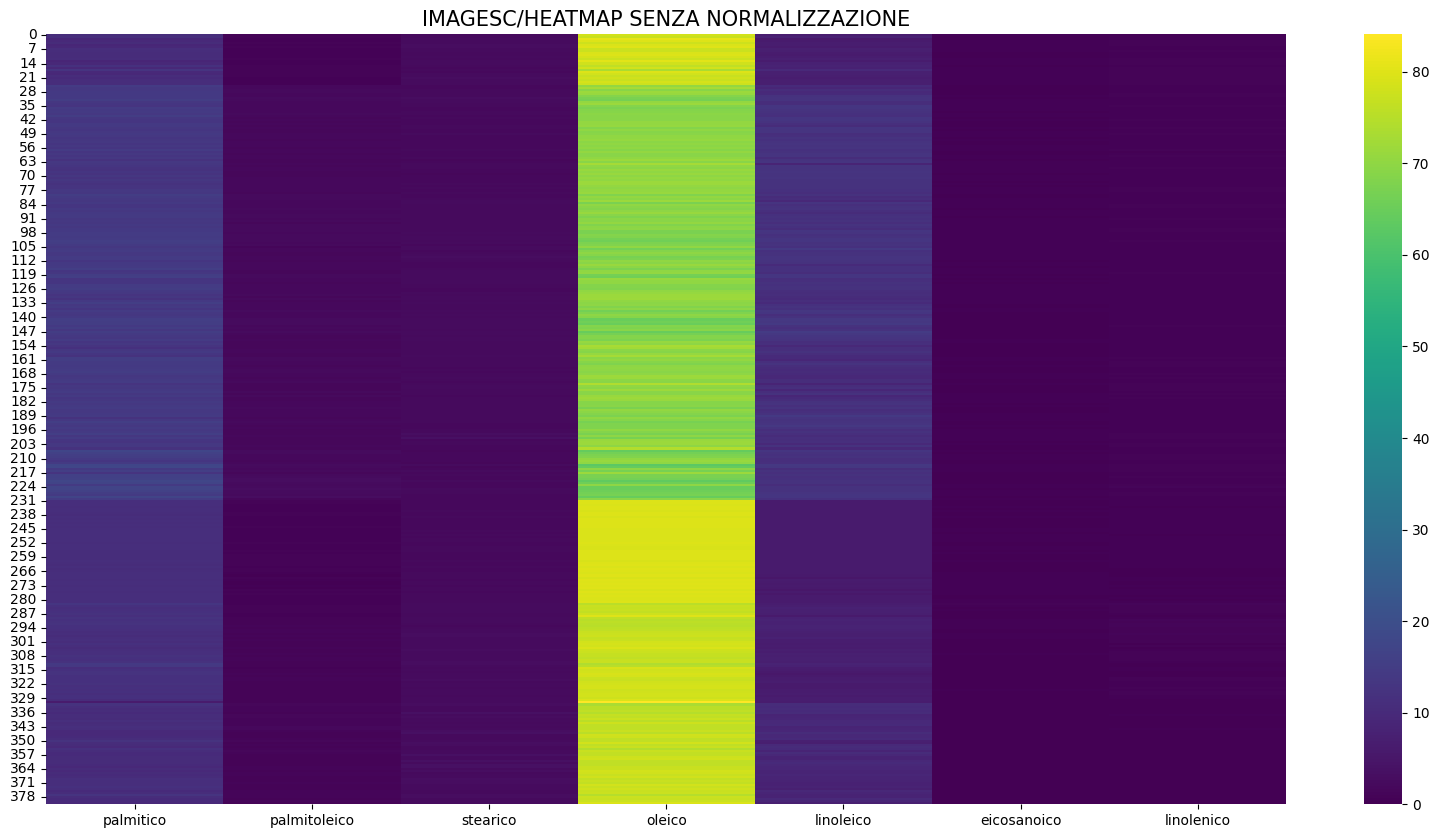

In [25]:
plt.figure(figsize=(20,10))

sns.heatmap(df.drop(columns='Categorie', axis=1), cbar=True, cmap='viridis')

plt.title('IMAGESC/HEATMAP SENZA NORMALIZZAZIONE', fontsize=15)

Utilizzo la heatmap come strumento di visualizzazione dei dati, poiché consente di rappresentare graficamente la concentrazione dei singoli acidi grassi attraverso variazioni di colore. Questo mi offre una visione chiara e completa dell'intero dataset.

L'acido grasso predominante è l'acido oleico, il cui contenuto supera i 60 mg, mentre gli altri acidi non raggiungono neppure i 20 mg. In particolare, gli acidi palmitico, stearico, eicosanoico e linolenico risultano essere i meno concentrati, con i due ultimi che si avvicinano quasi a valori prossimi allo zero. Questi acidi presentano una colorazione simile, suggerendo una certa correlazione tra le loro variabili. Un'altra coppia di acidi con caratteristiche leggermente affini è quella del palmitico e del linoleico, indicando che anche le loro misurazioni rientrano in un range simile, come confermato dalla matrice di dispersione.

L'acido oleico emerge come il miglior indicatore per distinguere la provenienza degli acidi grassi. Questa conclusione è ulteriormente avvalorata dall'osservazione della heatmap, dove si possono notare tonalità di colore più variate lungo la sua colonna rispetto alle altre. In questa variabile, si evidenzia chiaramente la presenza di un "pozzo" nelle concentrazioni: infatti, dalla trentesima alla duecentotrentesima misurazione, i valori risultano prevalentemente inferiori rispetto agli altri. Tale affermazione è supportata dall'individuazione di una zona verde scura che interrompe la tonalità gialla della colonna.

Esistono anche altri "pozzi", come nel caso dell'acido linoleico, sebbene non siano così evidenti come nel caso dell'oleico.

Infine, l'acido stearico presenta quasi esclusivamente una tonalità uniforme, confermando la sua natura più omogenea rispetto agli altri. Anche le ultime due variabili mostrano una colorazione simile, ma altri grafici hanno rivelato che non sono del tutto omogenee. Queste appaiono costantemente scure poiché i dati non sono stati normalizzati, rendendo difficile distinguere le micro-variazioni presenti.

In [26]:
norm = MinMaxScaler()
norm

MinMaxScaler()

In [27]:
norm.fit(df.drop(columns='Categorie', axis=1))

dfNorm = norm.transform(df.drop(columns='Categorie', axis=1))
dfNorm

array([[0.40682411, 0.22641509, 0.37373737, ..., 0.17016807, 0.51428571,
        0.58823529],
       [0.41819769, 0.21886792, 0.36363636, ..., 0.28466387, 0.44285714,
        0.59803922],
       [0.26334197, 0.14716981, 0.47474747, ..., 0.04096639, 0.44285714,
        0.61764706],
       ...,
       [0.34995622, 0.28301887, 0.29292929, ..., 0.48319328, 0.        ,
        0.        ],
       [0.33245833, 0.39622642, 0.49494949, ..., 0.37815126, 0.14285714,
        0.09803922],
       [0.30621178, 0.24528302, 0.44444444, ..., 0.24159664, 0.14285714,
        0.19607843]])

Text(0.5, 1.0, 'IMAGESC/HEATMAP CON NORMALIZZAZIONE')

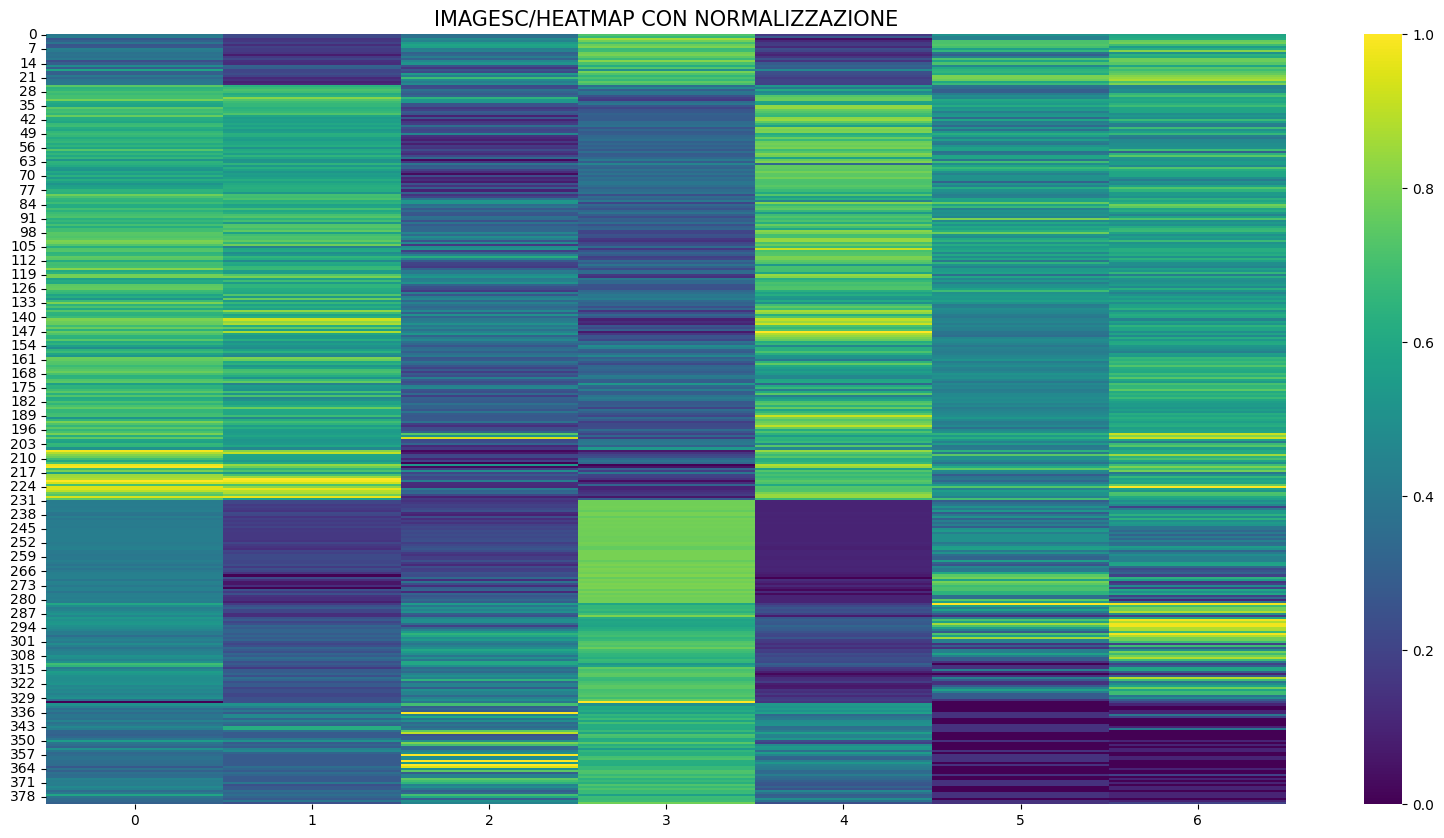

In [28]:
plt.figure(figsize=(20,10))

sns.heatmap(dfNorm, cbar=True, cmap='viridis')

plt.title('IMAGESC/HEATMAP CON NORMALIZZAZIONE', fontsize=15)

Effettuo la normalizzazione per rendere più coerenti le relazioni tra gli attributi e le informazioni derivanti da essi, indipendentemente dal loro valore reale.

È stato ripetutamente dimostrato che la variabile oleico (quarta colonna) presenta una correlazione inversa con il palmitico (colonna 0), il palmitoleico (colonna 1) e il linoleico (colonna 4). Nella variante attuale della heatmap, si può notare chiaramente che le righe con colori più intensi nei tre acidi in questione si presentano più scure nella colonna dell'oleico; viceversa, le righe che appaiono più scure in queste colonne sono caratterizzate da colori più accesi nell'oleico. Questo comportamento di climax non sarebbe emerso facilmente senza la normalizzazione dei dati.

Inoltre, il grado di somiglianza nelle concentrazioni delle ultime due colonne, che rappresentano rispettivamente gli acidi eicosanoico e linolenico, è diminuito leggermente. Sebbene persista una certa somiglianza—soprattutto nelle ultime osservazioni—essa è comunque ridotta. Questo risulta coerente con quanto evidenziato dalla matrice di dispersione, che non mostrava alcuna correlazione tra di essi.

Ora che i dati sono stati normalizzati, è evidente che la colonna più omogenea del dataset è quella relativa all'acido stearico, caratterizzata da un numero significativamente inferiore di righe chiare. Al contrario, nelle ultime due colonne, le differenze sono ben marcate.

Text(0.5, 1.0, 'MATRICE DI CORRELAZIONE AL QUADRATO')

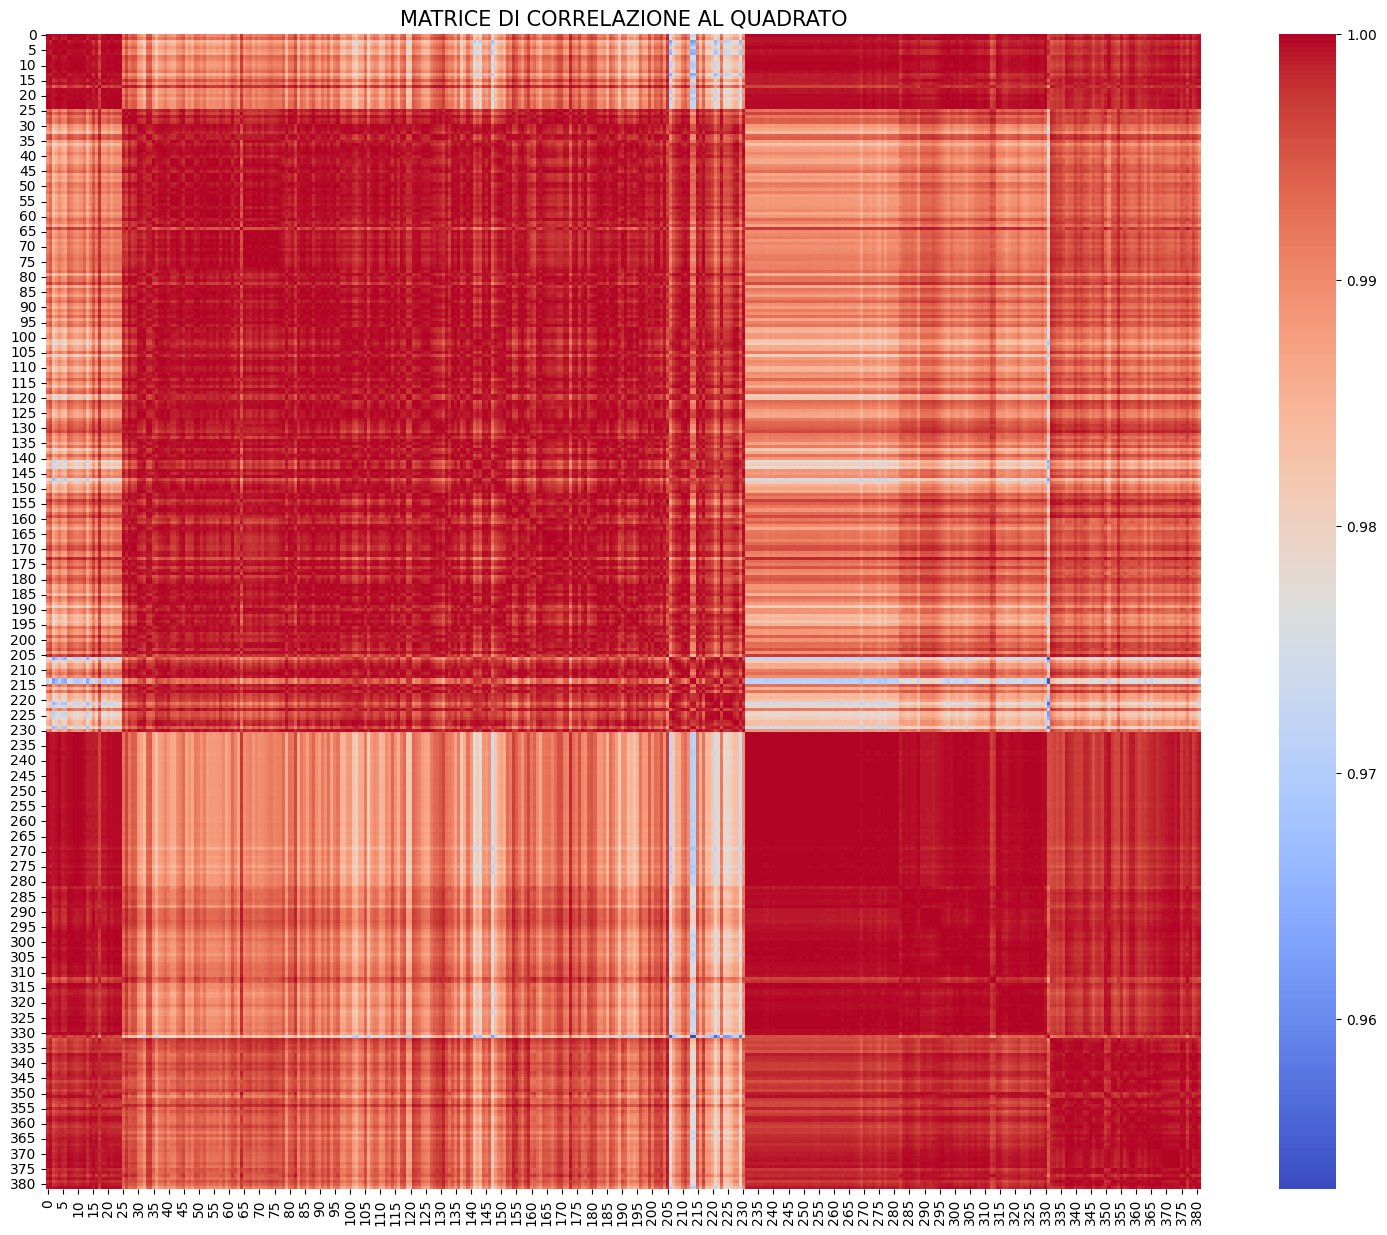

In [35]:
# Seleziono solo la parte che mi interessa maggiormente, ovvero solo le colone numeriche
dfNumerico = df.drop(columns='Categorie', axis=1)

# Calcolo la matrice di correlazione
corr_matrix = np.corrcoef(dfNumerico)

# Elevo al quadrato ogni elemento della matrice di correlazione
corr_matrix_squared = corr_matrix ** 2

# Visualizzo la matrice con sns.heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_squared, cmap='coolwarm', square=True, cbar=True)

plt.title('MATRICE DI CORRELAZIONE AL QUADRATO', fontsize=15)

La matrice di correlazione evidenzia la forza e la direzione delle relazioni lineari tra le variabili. Il quadrato dei valori di correlazione mette in risalto le relazioni più forti, rendendo questi valori ancora più evidenti. Grazie a questa rappresentazione, è possibile identificare rapidamente le relazioni significative. Le celle con valori elevati (vicini a 1) indicano una forte correlazione, mentre quelle con valori bassi (vicini a 0) suggeriscono una correlazione debole o assente.

Nel nostro caso, tutte le relazioni risultano forti, come dimostra il predominio del colore rosso nella mappa, con le tonalità blu della barra laterale che partono da un valore alto (superiore a 0.95), che rappresenta comunque un buon livello di correlazione.

All’interno del dataset, si possono osservare alcune righe in cui le correlazioni tra le osservazioni risultano particolarmente elevate, formando delle macro-celle. La più significativa di queste si estende dalla trentesima alla duecentotrentesima misurazione, corrispondente alla stessa regione in cui si manifesta il "pozzo" nell'oleico. Altri pattern di elevate correlazioni si registrano dalla misurazione in posizione 0 a 30, da 230 a 330 e da 330 fino alla fine del dataset. Questo comportamento potrebbe derivare dal fatto che le misurazioni delle concentrazioni di acidi grassi non sono miscelate; infatti, i gruppi di oli della stessa provenienza sono stati aggiunti in modo sequenziale, senza mescolare le diverse regioni.

Se questa affermazione si rivela corretta, implica che il dataset è altamente sbilanciato. Infatti, come si può osservare, i pattern non presentano dimensioni omogenee, suggerendo la presenza di un numero maggiore di gruppi di dati. Indagherò ulteriormente su questo aspetto!

In [30]:
df['Categorie'].value_counts()

Categorie
SA    206
U      51
EL     50
WL     50
NA     25
Name: count, dtype: int64

Il dataset presenta un notevole sbilanciamento: sono registrate oltre 200 osservazioni di oli extravergine di oliva provenienti dal sud della Puglia, rispetto a circa 50 per gli oli delle altre regioni, con il nord della Puglia che conta solo 25 osservazioni.

Questo squilibrio nelle categorie di appartenenza degli oli implica che l'analisi dei dati favorisca chiaramente quelli del sud della Puglia, a discapito di quelli del nord (e anche di tutti gli altri in realtà). Già all'inizio avevo notato un numero inferiore di punti blu negli scatter plot, e inizialmente pensavo che ciò fosse dovuto a sovrapposizioni. Tuttavia, ora sono convinto che il problema risieda nel numero limitato di osservazioni. Infatti, il piccolo pattern presente sulla mappa corrisponde agli oli del nord (NA), mentre quello più grande è associato a quello del sud, SA.